# Group Project PIC 16A

# Group Members
---
Kyle Ritscher 

Joyce Xu

Asli Bilgili

## Group Contributions
---

In general, our approach was for each person to do data visualization and make their own model. Then we picked the best visualizations and used each of our individual models. 
Regarding data visualization, Kyle constructed 6 plots on his own exploring the data. The third plot in our project is one of his. Joyce constructed 4 plots on her own exploring the data. None of hers made it to the final draft but her table was the one we decided to go with. Asli constructed ~25 plots on her own exploring the data. The first, second, and fourth plots in our final draft were hers. 

For the modeling, Kyle created the SVM model and presented analysis on it.  Joyce- the Random Forest model. Asli- the Nearest Neighbor model. 

Now, we had to take our independent code and explanations and combine them into a coherent project. We considered this the “writing” task. At this point, very little was done truly independently. Each member worked on different aspects but we were all reviewing each others work and asking each other for suggestions. Kyle combined all the code into a single document. In order to eliminate redundancies, he turned much of the stand alone code into functions that could be and were applied to different models. He then wrote all the docstrings and comments throughout. Joyce wrote the tutorial for the project overview, data import and cleaning, and feature selection sections, as well as the cross validation and visualization parts of explaining each model. Asli wrote the tutorial for exploratory analysis section, as well as the evaluation of unseen data and discussion mistakes part of explaining each model. The conclusion was written in words by Joyce but mostly developed through group discussion. The group discussion section was written in words by Kyle but also developed through group discussion. 






## Penguins Project Overview
---
The Penguins Project aims to classify the species of penguins in large volume based on a small set of measurements that are highly predictive of a penguin's species. For this project, we are using the Palmer Penguins data set, which contains measurements on three penguin species: Chinstrap, Gentoo, and Adelie. We will be performing a series of steps, including data import and cleaning, exploratory analysis, and feature selection, to discover one qualitative feature and two quantitative features that best predict a penguin's species. Then, we will be using different machine learning models to evaluate the unseen test data and analyze the performance of each model. 

## Data Import and Cleaning
---
To start the project, we are going to read in penguins data set, separate it into training and test sets, and clean it in various ways so that it appears to be much clearer and only contains information that are useful for further exploratory analysis and machine learning modeling (removes redundant information). 

The first and foremost step is to load the core libraries, or standard imports.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd   

Then, we will read in the penguins data set from csv into a pandas data frame. We will use the head() command to show the first five rows of the data frame. 

In [ ]:
url = "https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv"
penguins = pd.read_csv(url)
penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


We can see that the data set contains many information about the penguins. It includes qualitative features such as species, region, island, and sex, along with quantitative features such as culmen length, culmen depth, flipper length, body mass, and so on. 

Next, we will call the train_test_split function from sklearn.model_selection, which partitions the data into training and test sets by randomly selecting rows of the data frame to be in each set. 

In [ ]:
from sklearn.model_selection import train_test_split
# initialize random number generator
np.random.seed(8888)
train, test = train_test_split(penguins, test_size = 0.2)

Now we are going to preprocess the data by performing data cleaning. We will write two functions to prepare the data sets for both data visualization and machine learning modeling. 
*   The function that prepares the data sets for visualization mainly focuses on dropping columns that are not very useful for visualization and later modeling, including study name, individual ID, and comments, etc., along with removing all the NAs and making the species names more concise. 
*   The function that prepares the data sets for modeling focuses more on encoding qualitative columns with numerical values using **LabelEncoder** from preprocessing, and separating the data set into one without the species column, and another with only the species column. 
More specific information is available in the function docstrings. 

In [ ]:
from sklearn import preprocessing

def prep_penguins_data_vis(data_df):
    """
    prep_penguins_data_vis prepares the penguins data for visualization
    This means dropping redundant columns or renaming certain columns
    And removing any remaining NA's
    Returns df: the cleaned data set that can be used for visualization
    """
    df = data_df.copy()
    to_drop = ['studyName', 'Individual ID', 'Region', 'Sample Number', 
              'Stage', 'Clutch Completion', 'Date Egg', 'Comments']
    df = df.drop(to_drop, axis = 1)
    df = df.dropna()
    df['Species'] = df['Species'].str.split().str.get(0)
    return df
    
def prep_penguins_data_model(data_df) :
    """
    prep_penguins_data_vis prepares the penguins data for modeling
    This assumes an input which has already been prepared for visualization
    It then encodes the Species and Island columns as numeric columns
    And then separates the Species column from the rest of the data
    Returns x: data set without species column, and y: species column
    """
    df = data_df.copy()
    le = preprocessing.LabelEncoder()
    df['Species'] = le.fit_transform(df['Species'])
    df['Island'] = le.fit_transform(df['Island'])
    X = df.drop(['Species'], axis = 1)
    y = df['Species']   
    return(X, y)

# Biscoe = 0
# Dream = 1
# Torgersen = 2

# Adelie = 0 
# Chinstrap = 1
# Gentoo = 2

In [ ]:
penguins_train = prep_penguins_data_vis(train)
X_train, y_train = prep_penguins_data_model(penguins_train)

## Exploratory Analysis and Data Visualization
---
In this section, our group conducted exploratory analysis on the given penguins data. In summary, exploratory analysis refers to the initial process of performing an informal analysis and visualization on the dataset using figures and tables. While conducting exploratory analysis (comparing different portions of the dataset), we can realize patterns and abnormalities between different parameters. Even though the correlations we establish are immature, they can create the fundamental basis and give us insight on how we will analyze the data during the modeling part. The relationship trends within sub-dataset structures can also help us decide on which models to use while formally analyzing the dataset. For our exploratory analysis, we performed several data visualizations by comparing and contrasting the relationship between different dataset such as but not limited to Culmen Depth vs Culmen Length, Flipper Length vs Carbon Levels, etc. We did more exploratory analysis visualizations than it is displayed here but we decided to show some of the plots which might be relevant to our exploration. We also wanted to show the helpful and unhelpful visulizations and discussed their influence on how we proceeded with feature selection and constructed our models. With our exploratory analysis, we also detected the columns which could be extracted from the original dataset and decided on the qualitative variable we would be using for this project. We mainly used the seaborn and matplolib package to visualize our exploratory analysis. 

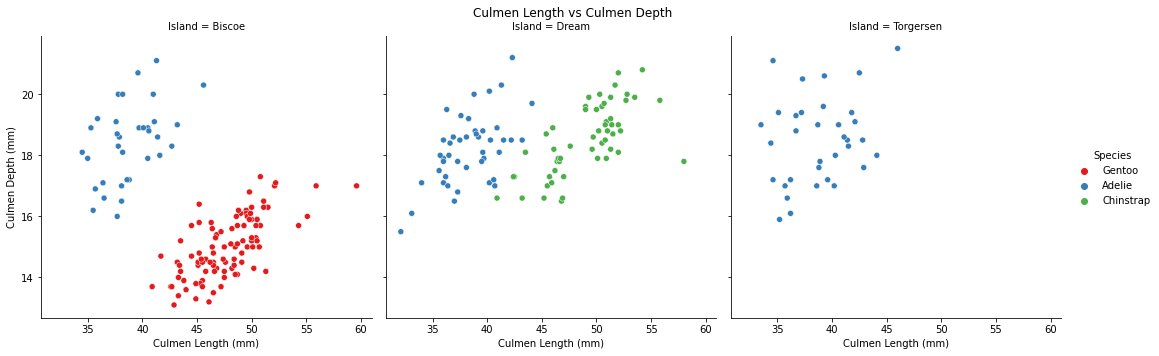

In [ ]:
import seaborn as sns
palette = sns.color_palette("Set1",3)

r = sns.relplot(data=penguins_train, x="Culmen Length (mm)", y="Culmen Depth (mm)", hue="Species", col = "Island", palette=palette)

r.fig.suptitle('Culmen Length vs Culmen Depth ')
r.fig.subplots_adjust(top=0.90)

To create our first exploratory analysis visualization, we used the seaborn package and explored the correlation between the culmen length and culmen depth of the penguins. The three species (Gentoo, Adelie and Chinstrap) were differentiated with different colors. The correlation between culmen length and depth were plotted and separated according to the islands (Biscoe, Dream and Torgersen) where penguin species were populated. Our figures showed a distinguishable positive correlation between culmen length and depth for all species in each island. If we examine the figure above, we can see that as the culmen length increases, it is possible to detect an increase in culmen depth as well. This comparison is clear and easy to read with human eye, and there seems to be no major errors or outliers that can create a noise in our train and test data. Thus, we may say that a comparison of culmen length and depth (separated by islands) can show us the concrete distinctions between different species. 

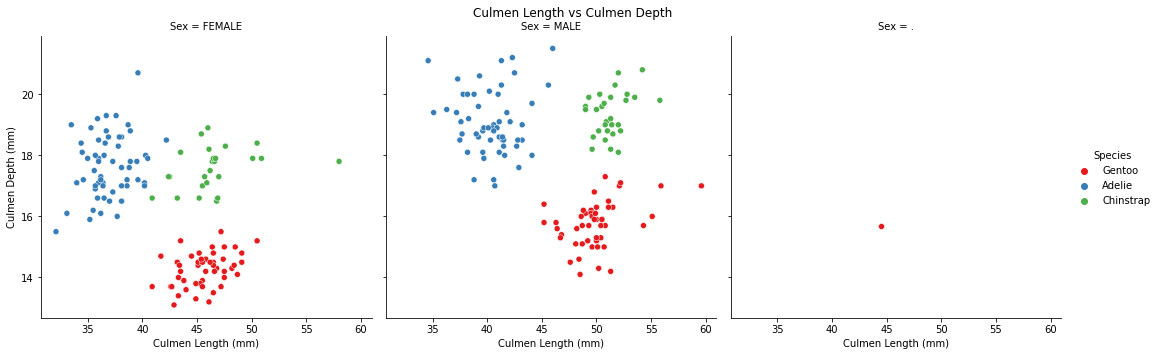

In [ ]:
# Using the other qualitative variable, Sex, to split our data is far less helpful
palette = sns.color_palette("Set1",3)

r = sns.relplot(data=penguins_train, x="Culmen Length (mm)", y="Culmen Depth (mm)", hue="Species", col = "Sex", palette=palette)

r.fig.suptitle('Culmen Length vs Culmen Depth ')
r.fig.subplots_adjust(top=0.90)

For our next exploratory analysis visualization, we used the seaborn package and explored the correlation between the culmen length and culmen depth of the penguins. The three species (Gentoo, Adelie and Chinstrap) were differentiated according to color. The correlation between culmen length and depth were plotted and separated according to sex (male and female). Distribution of the comparison according to sex did not give us a useful account on how species could be distinguished. It is possible to see the regions where different species get more condensed on the female and male plots. However, even though species were plotted according to sex, our visualization produced one more plot with no name and displayed one point indicating the Gentoo species. In addition the clusters in this plots are not as clear as the ones we constructed with the island as the qualitative variable. This visualization did not offer a concrete account on how we must construct our models and we also concluded that sex may not be a solid qualitaive variable for our analysis.

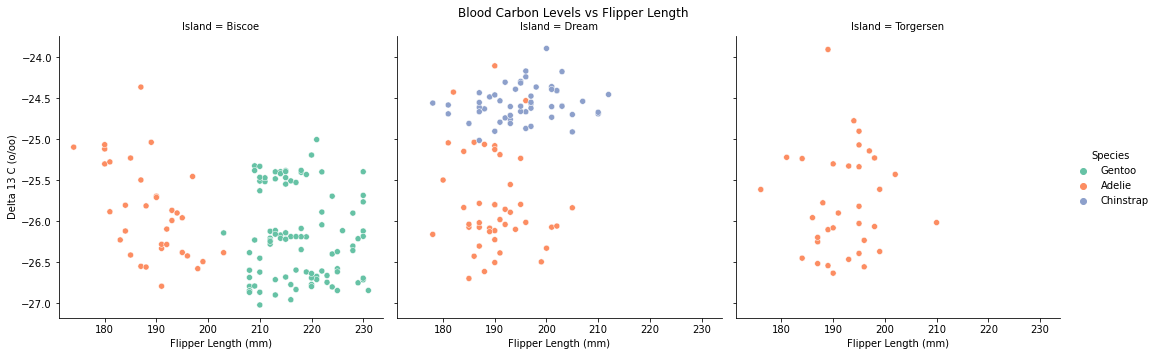

In [ ]:
# Flipper Length and C levels, the other pair with very noticeable differences
palette = sns.color_palette("Set2",3)

r = sns.relplot(data=penguins_train, x="Flipper Length (mm)", y="Delta 13 C (o/oo)", hue="Species", col = "Island", palette=palette)

r.fig.suptitle('Blood Carbon Levels vs Flipper Length')
r.fig.subplots_adjust(top=0.90)

For this next visualization, we used the seaborn package and explored the correlation between the flipper length and Delta 13 Carbon levels of the penguins. The three species (Gentoo, Adelie and Chinstrap) were differentiated with different colors. The correlation between flipper length and Delta 13 C were plotted and separated according to the islands (Biscoe, Dream and Torgersen) where penguin species were populated. Our figures displayed distinguisahble regions where different species were more condensely plotted according to islands. For example, in Biscoe island, Gentoo penguins tend to have longer flipper lengths than Adelie penguins. Both species' Carbon levels are distributed with approximately a similar density. In Dream island, Chinstrap penguins have higher Carbon levels than Adelie penguins, but Adelie has a bigger range. Both species' flipper lengths have similar densities. This figure shows us that the comparison between the flipper length and Delta 13 Carbon levels can show us the noticable differences between species.

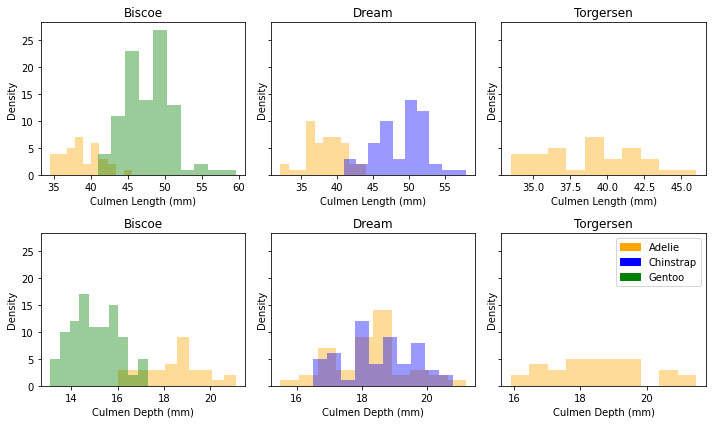

In [ ]:
from matplotlib import patches as mpatches
fig, ax = plt.subplots(2, 3, sharey = True, figsize = (10, 6))

# manually adding legend
Adelie = mpatches.Patch(color='orange', label='Adelie')
Chinstrap = mpatches.Patch(color='blue', label='Chinstrap')
Gentoo = mpatches.Patch(color='green', label='Gentoo')
plt.legend(handles=[Adelie, Chinstrap, Gentoo], loc = 1)

def plot_hist(df, colname, i, j, **kwargs):
    """
    plot_hist is more specific histogram function
    designed to be used in groupby.apply.
    It colors the histograms by species
    """
    colors = colors = {
        "Adelie" : "orange", 
        "Chinstrap" : "blue", 
        "Gentoo" : "green" 
    }
    island = df["Species"].iloc[0]
    ax[i, j].hist(df[colname], color = colors[island],**kwargs)


i = 0
j = 0
islands = ["Biscoe", "Dream", "Torgersen"]

for n in islands :
    subset = penguins_train[penguins_train["Island"] == n]
    subset.groupby("Species").apply(plot_hist,"Culmen Length (mm)", i = 0, j = i, alpha=.4)
    ax[0, i].set(xlabel = "Culmen Length (mm)", ylabel = "Density", title = n)
    i += 1

for n in islands :
    subset = penguins_train[penguins_train["Island"] == n]
    subset.groupby("Species").apply(plot_hist,"Culmen Depth (mm)", i = 1, j = j, alpha=.4)
    ax[1, j].set(xlabel = "Culmen Depth (mm)", ylabel = "Density", title = n)
    j += 1

plt.tight_layout()



For this exploratory analysis visualization, we used the matplotlib package to plot histograms and explored the distribution of the culmen length and culmen depth of the penguins. The three species (Gentoo, Adelie and Chinstrap) were differentiated with different colors. The correlation between culmen length and depth were plotted and separated according to the islands (Biscoe, Dream and Torgersen) penguin species were populated. For example, in Biscose island, the distribution of Gentoo penguins was more extended than the Adelie penguins in terms of culmen length. In terms of the culmen depth measured in Biscoe, Adelie penguins had higher depth than Gentoo penguins. In Dream island, Chinstrap penguins had higher culmen lepth than Adelie penguins. This figure helped us better visualize the distribution of the culmen length vs depth relationship that we have previously explored in the first figure of our exploratory analysis. 

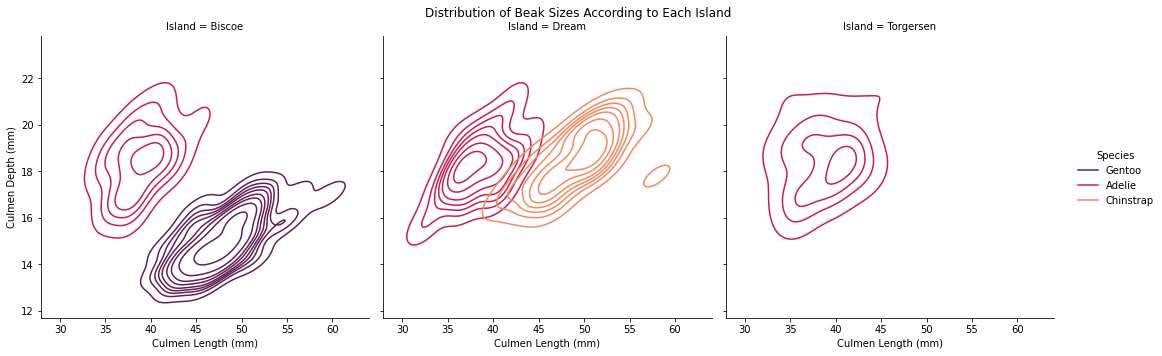

In [ ]:
dis=sns.displot(data=penguins_train, x="Culmen Length (mm)", y = "Culmen Depth (mm)", hue="Species", col="Island", kind="kde", palette="rocket")
dis.fig.suptitle('Distribution of Beak Sizes According to Each Island')
dis.fig.subplots_adjust(top=0.90)

For this Exploratory Analysis visualization, we used the seaborn package and explored the distribution of the Culmen Length and Culmen Depth of the penguins. The three species (Gentoo, Adelie and Chinstrap) were differentiated with different colors. The correlation between Culmen length and Depth were plotted and separated according to the islands (Biscoe, Dream and Torgersen) penguin species were populated. We chose to use displot for this visualization which used the properties of kde plot (kernel density estimate) plotting the correlation by using a continuous probability density. This plot basically showed us the regions we observed in the first plot of our Exploratory analysis, in terms of density. We can say that in Biscoe island, Adelie penguins have smaller Culmen Length but relatively higher Culmen Depth than Gentoo penguins. In Dream island, Adelie and Chinstrap penguins have approximatelty similar Culmen Depth levels but Chinstrap has higher Culmen Length than Adelie. This plot again, gives us a more clear account on the relationship between Culmen Length and Depth of different penguin species. Because we can detect a more clear correlation between those parameters, we can say that the comparison of Culmen Length and Depth according to each island can be a useful design to be used in our models. 

In [ ]:
penguins_train.groupby(["Island","Species"])["Culmen Length (mm)", "Culmen Depth (mm)"].aggregate([np.mean, np.min, np.max])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Culmen Length (mm)             Culmen Depth (mm)        \
                                  mean  amin  amax              mean  amin   
Island    Species                                                            
Biscoe    Adelie             38.829412  34.5  45.6         18.414706  16.0   
          Gentoo             47.759794  40.9  59.6         15.015464  13.1   
Dream     Adelie             38.352273  32.1  44.1         18.202273  15.5   
          Chinstrap          49.074074  40.9  58.0         18.524074  16.5   
Torgersen Adelie             38.814706  33.5  46.0         18.497059  15.9   

                           
                     amax  
Island    Species          
Biscoe    Adelie     21.1  
          Gentoo     17.3  
Dream     Adelie     21.2  
          Chinstrap  20.8  
Torgersen Adelie     21.5

According to the Exploratory Analysis visualizations we conducted, we decided that Culmen Length and Depth comparison according to islands gives us a solid account while differentiating species. Therefore, we created  a table displaying the mean, maximum and minimum values of Culmen Length and Culmen Depth of penguins. Table displayed those values according to species distributed in Biscoe, Dream and Torgersen islands. 

## Feature Selection
---

Based on our exploratory analysis, we already saw that for qualitative features, island would be more predictive of a penguin's species than sex. For quantitative features, culmen length and culmen depth appear to be very promising predictors, while flipper length and Delta 13 Carbon levels are representative of penguin species as well. Therefore, in this section, we decided to perform a more rigorous feature selection of our quantitative features using cross validation. We will loop through every distinct combination of two quantitative features plus the qualitative feature of island to find the combination of features with the best cross valiation score for different machine learning models. 

In [ ]:
# feature selection and cross validation functions
from sklearn.model_selection import cross_val_score

def check_column_score(cols, c):
    """
    Trains and evaluates a model via cross validation on the columns of the data 
    with selected indeces
    """
    return cross_val_score(c,X_train[cols],y_train,cv=5).mean()
    
def select_features(cols, c):
    """
    Scores every pair of 2 catagorical variables on cross validation
    Outputs the best pair
    Param cols: the catagorical variables
    Param c: the type of model to use, passed to check_column_score
    """
    best = 0
    best_cols = []
    for m in cols:
        for n in cols:
            to_use = [m, n, "Island"]
            score = check_column_score(to_use, c)
            if score >= best:
                #update
                best = score
                best_cols = to_use
    print("The CV score for the best features is : " + str(best))
    return(best_cols)

cols = ["Culmen Depth (mm)", "Culmen Length (mm)", "Flipper Length (mm)", 
        "Body Mass (g)", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"]


Now, we will apply the select_features function on the following machine learning models on each to determine the best features to use for each model. 


1.   __Support Vector Machines__ are a set of supervised learning methods that can be used for classification, regression, and outliers detection. Here, we are using the __Support Vector Classification__ model, which constructs a hyperplane whose distance to the nearest training data point of any class is the largest, and the hyperplane will act as the decision boundary for classification. 
2.   __Nearest Neighbors Classification__ is a model that first 
simply stores instances of training data, then it estimates the likelihood that a data point will become a member of a group or another based on what group the data points nearest to it belongs to. Here, we are using the __k-nearest neighbor classification__ in KNeighborsClassifier, where k is the number of nearest neighbors of each query point that will be examined, and it is an integer value specified by the user. 
3. __Random Forest__ is an ensemble learning method that constructs multiple decision trees at the same time. Decision trees predict the value of a target variable by learning simple decision rules inferred from the training data features. Here, we are using the __Random Forest Classifier__, where the output would be the group selected by the most trees. 


In [ ]:
# Model 1: Support Vector Machines
from sklearn import svm
SVM = svm.SVC()
select_features(cols, SVM)

The CV score for the best features is : 0.8820029027576197


['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island']

In [ ]:
# Model 2: Nearest-Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
select_features(cols, neigh)


The CV score for the best features is : 0.973367198838897


['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island']

In [ ]:
# Model 3: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
select_features(cols, RF)

The CV score for the best features is : 0.9847605224963715


['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island']

Based on the output results, we can see that for all three models, __culmen length, culmen depth, and island__ is the set of features with the highest cross validation score, meaning they are the most predictive of a penguin’s species. Therefore, we will be using these three features for all of our models, so we decided to reduce the X_train data set to only include these columns. 

In [ ]:
features=["Culmen Length (mm)","Culmen Depth (mm)","Island"]
X_train=X_train[features]

## Modeling
---
In this section, we will deploy each of the three machine learning models mentioned above (Support Vector Classification, k-nearest neighbor classification, and Random Forest Classifier) and evaluate their performances. We will break this process down into four parts: 
1. Perform a cross-validation to choose the best complexity parameter for each model.
2. Fit each model onto the training data set, run an accuracy test on the unseen testing data set, and create a confusion matrix for each model to show the specific mistakes in the model’s prediction
3. Prepare a visualization of decision regions for each model, with one plot corresponding to each value of the qualitative variable. 
4. Discuss the mistakes made by each model, and why the algorithm behind each model might have led to the mistake. 


**Complexity Selection**

Now we are going to perform a cross-validation to choose the best complexity parameter for each model. Below is a brief introduction to the complexity parameter of each model and what they specify: 
1. For Support Vector Classification, the complexity parameter would be **gamma**, which is a float that represents the kernel coefficient. It defines how far the influence of a single training example reaches. If the value of gamma is low, it means the influence of each single training example would be far and not very significant, whereas the value of gamma is high, it means that the influence of each training example would be close and significant. 
2. For k-nearest neighbor classification, the complexity parameter would be **n_neighbors**, which is an integer that specifies the number of neighbors to consider examining each target data point.
3. For Random Forest Classifier, the complexity parameter would be **max_depth**, which is an integer that specifies the maximum depth of the tree. 

We will now write a function called plot_complexity. For each complexity parameter, we will loop through a set of possible values and perform the cross-validation on each value to find out the value with the highest cross-validation score. Since gamma is a float, we will loop through decimals from 0.05 to 0.95, with an increment of 0.05 in bewteen each number. On the other hand, since n_neighbors and max_depth are integers, we will loop though integers between 1 and 19. 

A scatterplot of each model’s possible complexity parameter value against the cross-validation score would be plotted to illustrate the comparison more clearly. In addition, the value of the complexity parameter with the highest cross-validation score will be stored and returned as a variable named best_complexity, which will later be employed to fit the models on our training data sets. 

In [ ]:
def plot_complexity(model_name):
    """
    creates a scatterplot of the cv scores of a given model 
    as a parameter's complexity varies
    models considered are in the models dictionary
    parameters of choice are in the params dictionary
    axis dictionary is for convience of plotting and indexing
    to consider more models, add them to the dictionaries
    input the model name, must match the names in the dictionaries
    returns the best complexity
    """

    params = {
    "svm" : [{'gamma' : i / 20.} for i in range(1, 20)],
    "nnc" : [{'n_neighbors' : n} for n in range(1, 20)],
    "rf" : [{'max_depth' : d} for d in range(1, 20)]
    }

    models = {
        "svm" : svm.SVC,
        "nnc" : KNeighborsClassifier,
        "rf" : RandomForestClassifier,
    }

    axis = {
        "svm" : np.linspace(0.05, 0.95, 19),
        "nnc" : np.arange(1, 20),
        "rf" : np.arange(1, 20)
    }
    
    model = models[model_name]
    _param = params[model_name]
    
    scores=np.zeros(len(_param))
    best_score=-np.inf
    
    i = 0 # index counter
    for p in _param:
        fitted = model(**p)
        scores[i] = cross_val_score(fitted, X_train, y_train, cv=5).mean()
        if scores[i]>best_score: 
            #update
            best_score=scores[i]
            best_complexity = round(axis[model_name][i], 2)
        i += 1

    ax.scatter(axis[model_name],scores)
    return best_complexity
    


[Text(0, 0.5, 'Cross Validation Score'),
 Text(0.5, 0, 'SVM Gamma Complexity'),
 Text(0.5, 1.0, 'Best Gamma: 0.45')]

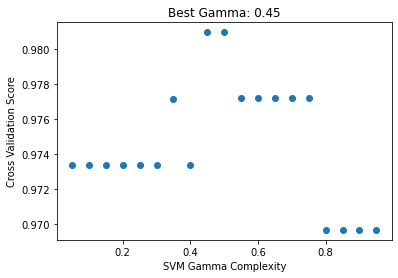

In [ ]:
#Complexity Selection/Display for Model 1
fig,ax=plt.subplots(1)
best_gamma = plot_complexity("svm")
ax.set(xlabel="SVM Gamma Complexity", ylabel="Cross Validation Score",
       title="Best Gamma: "+str(best_gamma))

[Text(0, 0.5, 'Cross Validation Score'),
 Text(0.5, 0, 'Number of Neighbors'),
 Text(0.5, 1.0, 'Best Number: 1')]

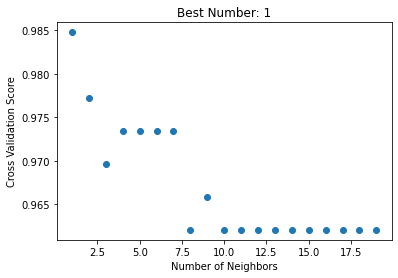

In [ ]:
#Complexity Selection/Display for Model 2
fig,ax=plt.subplots(1)
best_number = plot_complexity("nnc")
ax.set(xlabel="Number of Neighbors", ylabel="Cross Validation Score",
       title="Best Number: "+str(best_number))

[Text(0, 0.5, 'Cross Validation Score'),
 Text(0.5, 0, 'Depth'),
 Text(0.5, 1.0, 'Best Depth: 6')]

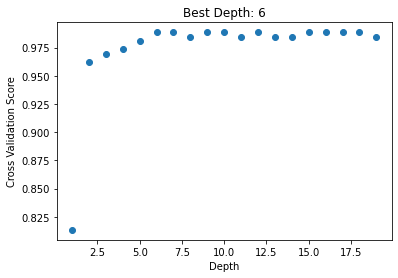

In [ ]:
#Complexity Selection/Display for Model 3
fig,ax=plt.subplots(1)
best_depth= plot_complexity("rf")
ax.set(xlabel="Depth", ylabel="Cross Validation Score",
       title="Best Depth: "+str(best_depth))

Based on the results demonstrated above, the best value of gamma for support vector classification is 0.45, the best value of n_neighbor for k-nearest neighbor classification is 1, and the best value of max_depth for random forest classifier is 6. We store each of them as variables named best_gamma, best_number, and best_depth, and use these as our complexity parameters to fit the models on our training data. 

In [ ]:
# creating our three models with the best complexity
SVM_best = svm.SVC(gamma = best_gamma)
SVM_best.fit(X_train, y_train)
NNC_best = KNeighborsClassifier(n_neighbors = best_number)
NNC_best.fit(X_train, y_train)
RF_best = RandomForestClassifier(max_depth = best_depth)
RF_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=6)

**Evaluation on Unseen Data**

In the previous section, we created our three models according to the best complexity values that could be assigned to those models. In order to understand which model worked best with the features we selected and the complexity parameters we used, we will run an accuracy test on these three models. 

First, we are going to clean our test data and prepare it for modeling using the prep_penguins_data_vis and pre_penguins_data_model functions written above. We are also going to reduce the X_test data set to include only the columns of __culmen length, culmen depth, and island__ because they are the features our model is based on. 

In [ ]:
penguins_test = prep_penguins_data_vis(test)
X_test, y_test = prep_penguins_data_model(penguins_test)
X_test = X_test[features]

Then, we will apply the score( ) command on the test data sets for each model, which measures the accuracy of each of our models taking the X_test and y_test as parameters. 

In [ ]:
SVM_best.score(X_test, y_test)

0.967741935483871

In [ ]:
NNC_best.score(X_test, y_test)

0.967741935483871

In [ ]:
RF_best.score(X_test, y_test)

1.0

We can see that Support Vector Classification gave an accuracy score of approximately 96.8%. k-nearest neighbor classifications classifier also gave an accuracy score of approximately 96.8%. Finally, Random Forests Classifier gave the most accurate results with an accuracy score of 100%. 

**Constructing Confusion Matrices**

A confusion matrix gives us an account on the summary of predicted results we received with our classification. The matrix shows the actual classification and predicted classification results and compares if they match. Confusion matrices can be used as a supplemental tool alongisde with accuracy calculations. Accuracy tells us how well our model did when we run on our data. Confusion matrices can show us the specific incidents our models made the mistakes, which automatically influences the accuracy scores. Here, we will write a function called **confusion_table**, which will not only return the confusion matrix but also return a table that concats the specific prediction mistakes that the model makes. The Species column is depicting the actual penguin species, while the Predicted Species column is showing the predicted results of classification. 

In [ ]:
from sklearn.metrics import confusion_matrix

def confusion_table(model):
    """
    confusion_table constructs and prints a confusion matrix for a given model
    and returns a table displaying the mistaken points in the testing data
    """
    y_pred = model.predict(X_test)

    c = confusion_matrix(y_test, y_pred)
    print(c)

    mask = (y_test != y_pred)
    mistakes= X_test[mask]
    mistakes_df = pd.concat((mistakes, y_test[mask]), axis = 1)
    mistakes_df.loc[:, "Predicted Species"] = y_pred[mask]
    return mistakes_df

# reminder
# Biscoe = 0
# Dream = 1
# Torgersen = 2

# Adelie = 0 
# Chinstrap = 1
# Gentoo = 2

In [ ]:
confusion_table(SVM_best)

# one Gentoo predicted to be Chinstrap on Biscoe
# one Adelie predicted to be Chinstrap on Torgersen

[[26  1  0]
 [ 0 13  0]
 [ 0  1 21]]


,Culmen Length (mm),Culmen Depth (mm),Island,Species,Predicted Species
257,44.4,17.3,0,2,1
73,45.8,18.9,2,0,1


Support Vector Classification's confusion matrix showed that on Biscoe island, one Gentoo penguin was classified as Chinstrap. On Torgersen island, one Adelie penguin was mistakenly classified as Chinstrap.

In [ ]:
confusion_table(NNC_best)
# one Chinstrap predicted to be Gentoo on Dream
# one Adelie predicted to be Chinstrap on Torgersen

[[26  1  0]
 [ 0 12  1]
 [ 0  0 22]]


,Culmen Length (mm),Culmen Depth (mm),Island,Species,Predicted Species
202,48.1,16.4,1,1,2
73,45.8,18.9,2,0,1


k-nearest neighbor classification classification's confusion matrix showed that on Dream island, one Chinstrap penguin was classified as Gentoo. On Torgersen island, one Adelie penguin was mistakenly classified as Chinstrap.

In [ ]:
confusion_table(RF_best)
# no mistakes

[[27  0  0]
 [ 0 13  0]
 [ 0  0 22]]


,Culmen Length (mm),Culmen Depth (mm),Island,Species,Predicted Species


Random Forest Classifier's confusion matrix showed no mistakes, matching the 100% accuracy score shown above.

**Plot Decision Regions and Analyze Mistakes**

Now we are going to plot our decision regions, which visualize parts of data space that the model assigns to each label. The contours along which different decision regions meet are the decision boundaries. In practice, this means storing the model's predictions for a large number of points in a 2-dimensional plane, and then plotting different predictions in different colors. For each model, we will make three separate decision region plots for each island. In order to do so, we will write a function named **plot_regions**. 

In [ ]:
from matplotlib.colors import ListedColormap

def plot_regions(x, c) :
    """
    plot_regions plots the decision regions given a model c 
    with a scatterplot for X_train and y_train overlayed
    designed to be separated by island, and requires plots to be defined beforehand
    """
    island = x["Island"].iloc[0]
    y = y_train[X_train["Island"] == island]
    
    x0 = x["Culmen Length (mm)"]
    x1 = x["Culmen Depth (mm)"]
    
    # makes 501 by 501 grid corresponding to an xy plane of beak sizes
    grid_x = np.linspace(x0.min()-1, x0.max()+1, 501)
    grid_y = np.linspace(x1.min()-1, x1.max()+1, 501)
    xx, yy = np.meshgrid(grid_x, grid_y)

    # unfolding the grid into a useable array
    XX = xx.ravel()
    YY = yy.ravel()

    # add in the island data in a similar format
    ZZ = np.ones(251001) * island
    
    # make predictions using arrays 
    p = c.predict(np.c_[XX, YY, ZZ])
    p = p.reshape(xx.shape)
    
    # dictionaries to assign colors 
    Island_names = {
        0 : "Biscoe", 
        1 : "Dream", 
        2 : "Torgersen" 
    }
    
    colors = {
        0 : "Purple", 
        1 : "teal", 
        2 : "gold" 
    }
  
    ax[island].contourf(xx, yy, p, levels = [-1, 0, 1, 2], 
                         alpha = 0.2, colors = ("purple", "teal", "yellow"))
    # levels and colors arguments fix coloring between plots
    ax[island].scatter(x0, x1, c = y.map(colors))
    ax[island].set(xlabel = "Culmen Length (mm)", title = Island_names[island])
    
    # constructing the legend manually
    Adelie = mpatches.Patch(color='purple', label='Adelie')
    Chinstrap = mpatches.Patch(color='teal', label='Chinstrap')
    Gentoo = mpatches.Patch(color='gold', label='Gentoo')
    Mistakes = mpatches.Patch(color='red', label='Mistakes')
    plt.legend(handles=[Adelie, Chinstrap, Gentoo, Mistakes])
    

For each model, we are going to call the groupby() command in order to split up the test data based on the qualitative feature of islands. This will allow us to create a decision region plot for each island. We also decided to make the mistakes in each model more explicit on the decision region plot by making these data points red. We manually do so using the index number obtained from the confusion matrices constructed above. 

**Decision Regions of Support Vector Classification Model and Analysis of Mistakes**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


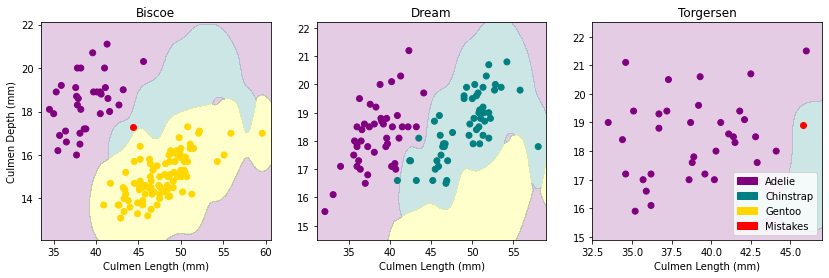

In [ ]:
# Model 1 Decision Regions
fig, ax = plt.subplots(1, 3, figsize = (14,4))
ax[0].set(ylabel = "Culmen Depth (mm)")
X_train.groupby(["Island"]).apply(plot_regions, SVM_best)

# Adding the mistake points to the decision regions
ax[0].scatter(X_test.loc[[257]]["Culmen Length (mm)"],
              X_test.loc[[257]]["Culmen Depth (mm)"],
              color = "red")
ax[2].scatter(X_test.loc[[73]]["Culmen Length (mm)"],
              X_test.loc[[73]]["Culmen Depth (mm)"],
              color = "red")
# the warning doesn't happen in jupiter so I am ignoring it

As our confusion matrix for Support Vector Classification showed us, the model predicted two penguin species mistakenly. This model predicted one Gentoo as Chinstrap on Biscoe, and one Adelie as Chinstrap on Torgersen. These mistakes are distinugishably interesting because of the species it predicted the penguins as. First of all, there are no Chinstrap penguins populated on Biscoe, but the model took Chinstrap into consideration and modeled it as one of the decision regions for Biscoe. In a perfectly accurate model, Biscoe would only show two decision regions which are for Adelie and Gentoo. This model made the same type of mistake on Torgersen as well. On Torgersen, only Adelie penguins are populated, but the model plotted decision regions for Chinstrap as well and classified one penguin as Chinstrap. Again, in a perfectly accurate model, there would only be one decision region for Adelie on Torgersen. We alredy know earlier from the tutorial that Support Vector Classfication models create a hyperplane whose distance is the largest according to the nearest training data point, and decision regions are constructed in relation to these distances. For Support Vector Classification, we may argue that the model deemed that data point as having the largest distance to the nearest hyperplane took that point as part of another decision region. For example, if that specific mistaken Gentoo penguin had traits more similar to that of a Chinstrap on Biscoe, the model may predict the potential existence of Chinstrap and plot the decision regions accordingly, which ultimately causes the mistake. This may be the reason why SVM created decision regions which might not exist in reality according to a slighlty miscalculated hyperplane. 

**Decision Regions of k-Nearest Neighbors Classifier Model and Analysis of Mistakes**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


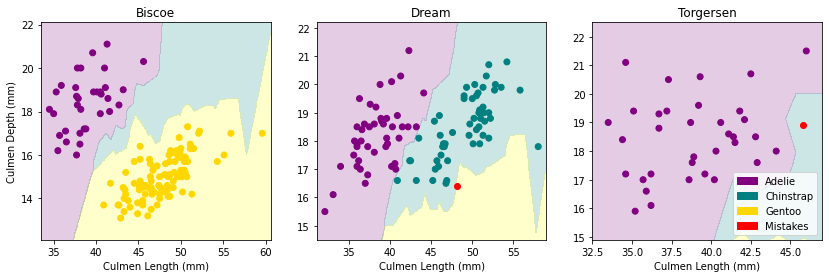

In [ ]:
# Model 2 Decision Regions
fig, ax = plt.subplots(1, 3, figsize = (14,4))
ax[0].set(ylabel = "Culmen Depth (mm)")
X_train.groupby(["Island"]).apply(plot_regions, NNC_best)

# Adding the mistake points to the decision regions
ax[1].scatter(X_test.loc[[202]]["Culmen Length (mm)"],
              X_test.loc[[202]]["Culmen Depth (mm)"],
              color = "red")
ax[2].scatter(X_test.loc[[73]]["Culmen Length (mm)"],
              X_test.loc[[73]]["Culmen Depth (mm)"],
              color = "red")

As our confusion matrix for the k-nearest neighbors classifer model showed us, the model predicted two penguin species mistakenly. It predicted one Chinstrap as Gentoo on Dream, and one Adelie as Chinstrap on Torgersen. These mistakes are again considerably interesting because of the species it predicted the penguins as which is similar to the case we had for the SVM model. To begin with, there are no Gentoo penguins populated on Dream, but the model took Gentoo into consideration and modeled it as one of the decision regions for Dream. In a perfectly accurate model, Dream would only have two decision regions which are for Adelie and Chinstrap. The k-nearest neighbors classifier model made the same type of mistake on Torgersen as well. On Torgersen, only Adelie penguins are populated, but the model plotted decision regions for Chinstrap as well and classified one penguin as Chinstrap. This is exactly the same mistake we observed in the SVM model. Again, in a perfectly accurate model, it would only plot one decision region for Adelie on Torgersen. The k-nearest neighbors classifier model creates decision regions according to the distances of each (same type) in relation to each other. This means that the possibility of a data point belonging to a certain region is determined according to its distance to the data clusters. The model takes the data point as the part of a cluster that data point is closest to. According to this model construction, we may argue that those mistaken points may be too distanced from the training data cluster they had actually belonged to, and the model may have taken that point as part of another cluster it is closest to which, in conclusion, labels these data points as parts of other decision regions they did not belong to. For example, if that specific mistaken Adelie penguin on Torgersen had traits more similar to that of a Chinstrap, the model may predict the potential existence of Chinstrap and plot the decision regions accordingly, which ultimately rsults in the mistake. This also explains why the k-nearest neighbors classifier model creates decision regions for Chinstrap on Biscoe, Gentoo on Dream and Chinstrap on Adelie. 

**Decision Regions of Random Forest Classifier Model and Analysis of Mistakes**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


""


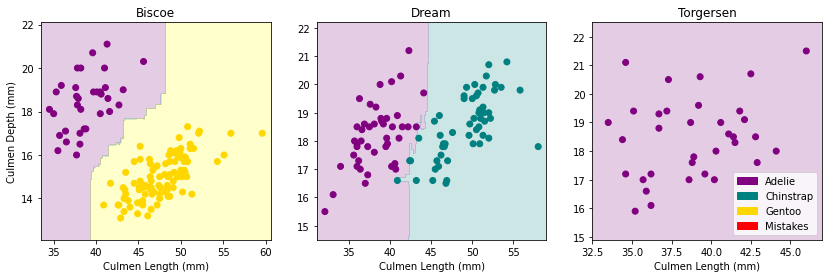

In [ ]:
# Model 3 Decision Regions
fig, ax = plt.subplots(1, 3, figsize = (14,4))
ax[0].set(ylabel = "Culmen Depth (mm)")
X_train.groupby(["Island"]).apply(plot_regions, RF_best)

# No mistake points to add

As our confusion matrix for the Random Forest Classifier showed us, the model did not predict any species wrong. The accuracy score also stated that the model worked with 100% accuracy. For the Random Forest Classifier model, it is crucial to mention that it did not plot any decision regions for species which were not populated on a specific island. The Random Forest Classifier model accurately plotted the decision regions for Biscoe, Dream and Torgersen, and did not return any mistakenly classified penguin species. As we learned earlier in the tutorial, Random Forest models construct several decision trees. One important aspect is that it uses randomness while constructing those decision trees. Then, the model chooses the best results from thse randomized decision tree subsets. The randomness aspect of Random Forest makes it a suitable candidate for classifying and analyzing the penguin data in particular. Members of a species may not always show identical traits expected from their species because biological traits can be diverse, and they can even be modified according to the characteristics of different habitats that the penguin lives in. Because Random Forest uses a high degree of randomization, the effect of similarities between different species would not have a significant and confusing influence on the model while classfying the species. The distance aspect that Support Vector Classification and k-nearest neighbor adopt, however, can create confusion for the models because the effect of similar traits of different species is not reduced with randomization. In the end, models are not humans and they cannot consider the biological and ecological alterations on physiological traits if they are not given a considerable amount of data and information. We could expect the Support Vector Classification and k-nearest neighbor classification models to work better if they were given a bigger data set; in that case, the models would have more information regarding the varieties within a certain trait. With the given data set for the penguin species, we can say that the Random Forest Classifier model worked the best.

## Conclusion and Final Discussion

---



To recap, we first imported and cleaned the Palmer Penguins data set and separated it into training and testing data sets. Then, we performed exploratory analysis to visualize the training data set and get a better sense of which features are more predictive of a penguin’s species. Subsequently, we used feature selection to more rigorously select the features we will use for our machine learning models by calculating cross-validation scores. The three models we deployed are support vector classification, k-nearest neighbor classification, and random forest classifier. The best set of features for all three models turned out to be culmen length, culmen depth, and island. Afterwards, we used cross-validation to find the best complexity parameter, and use that to fit our models on the training data set. We then evaluated the model on unseen test data and created a confusion matrix to show the specific mistakes in the predictions of each model. Finally, we created decision region plots and analyzed the potential reasons behind each model’s mistakes. 

Overall, all three models performed very well: support vector classification and k-nearest neighbor classification both scored 96.8%, making only minor mistakes in the predictions of penguin species, while random forest classifier scored 100%, making no mistakes in the predictions. For this particular data set on penguins, we would recommend the **random forest classifier model**. We can see from the decision regions plot that the random forest classifier model deals better with the qualitative feature of island, avoiding instances when there were actually no Chinstraps on Torgersen, but there were particular decision regions plotted for this species Torgersen. In addition to the advantage that random forest working better with qualitative features, or categorical data, the other two models have specific disadvantages that make them less accurate under this circumstance. For instance, support vector classification might work better in a highly dimensional space due to its algorithm of constructing a hyperplane that acts as the decision boundary for classification. However, in this case we are only using the model on a three-dimensional space because we only picked the three features that are most predictive of a penguin's species. On the other hand, k-nearest neighbor might be more sensitive to outliers, leading to mistakes that might seem unreasonable from the human perspective. Also, when the training data set is imbalanced, k-nearest neighbor classification model might result in more mistaken predictions because the predictions might lean towards the species group that originally has more training data on.

Finally, we believe that the machine learning models could be **further improved** if we have a **larger data set with more penguins**. Since our initial Palmer Penguins data set only contains information of around 350 penguins, the data set is relatively small. It would be harder to train on a smaller data set because of the limited amount of existing information, and the accuracy on a small data set could be influenced more by the random train test split. In addition, a larger data set would have a better resemblance of the population, making the predictions more accurate. 

## Sources and Citations
---

1.   **Support Vector Machines**




* 1.4. Support Vector Machines. scikit. (n.d.). Retrieved March 10, 2022, from https://scikit-learn.org/stable/modules/svm.html 


* Support Vector Machines (SVM) algorithm explained. MonkeyLearn Blog. (2017, June 22). Retrieved March 10, 2022, from https://monkeylearn.com/blog/introduction-to-support-vector-machines-svm/ 


2.   **Nearest Neighbors Classification**
* Joby, A. (n.d.). What is K-nearest neighbor? an ML algorithm to classify data. Learn Hub. Retrieved March 10, 2022, from https://learn.g2.com/k-nearest-neighbor 


* Sklearn.neighbors.kneighborsclassifier. scikit. (n.d.). Retrieved March 10, 2022, from https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier 


3. **Random Forest**

* Sklearn.ensemble.randomforestclassifier. scikit. (n.d.). Retrieved March 10, 2022, from https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 


* Yiu, T. (2021, September 29). Understanding random forest. Medium. Retrieved March 10, 2022, from https://towardsdatascience.com/understanding-random-forest-58381e0602d2#:~:text=The%20random%20forest%20is%20a,that%20of%20any%20individual%20tree. 
